In [5]:
from data_tools.query import DBClient
import datetime

In [21]:
start_dt = datetime.datetime.now(datetime.timezone.utc)
end_dt = datetime.datetime.now(datetime.timezone.utc) - datetime.timedelta(days=6)

In [22]:
client = DBClient()

In [25]:
gps_lat = client.query_time_series(end_dt, start_dt, "GPSLatitude", granularity=1.0)
gps_lon = client.query_time_series(end_dt, start_dt, "GPSLongitude", granularity=1.0)

In [27]:
gps_lon.datetime_x_axis[0]

Timestamp('2025-05-30 02:45:33.999000072')

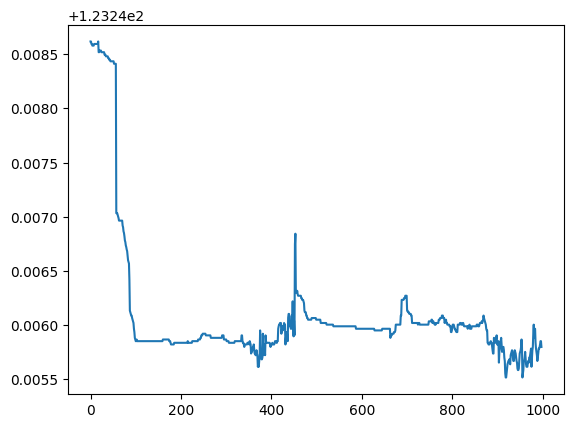

In [52]:
import matplotlib.pyplot as plt
import numpy as np


idx = np.where(gps_lat > 123.21)

latitude = gps_lat[idx]

plt.plot(latitude)

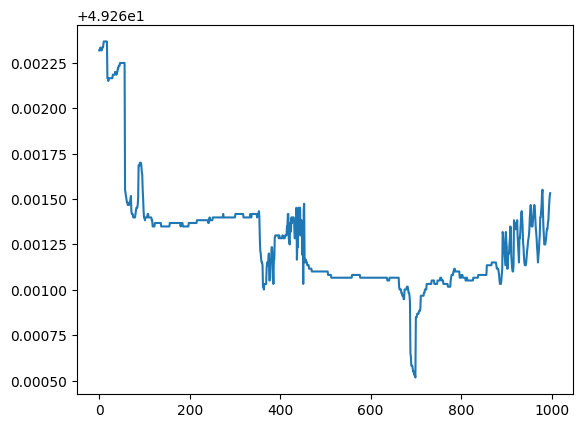

In [53]:
idx = np.where(gps_lon > 49.25)

longitude = gps_lon[idx]

plt.plot(longitude)

In [58]:
import folium

# 1) Suppose you already have two lists (or arrays) of equal length:
#    `lats = [lat1, lat2, lat3, ...]`
#    `lons = [lon1, lon2, lon3, ...]`
#
#    For illustration, here’s a small synthetic example:
lats = longitude
lons = -latitude

# 2) Zip them into a list of (lat, lon) pairs in the order you want the path drawn:
locations = list(zip(lats, lons))
#    locations == [(49.2827, -123.1207),
#                  (49.2830, -123.1210),
#                  (49.2833, -123.1213),
#                  (49.2836, -123.1216),
#                  (49.2839, -123.1219)]

# 3) Create a Folium Map object, centering (and zooming) roughly on the first point:
m = folium.Map(location=locations[0], zoom_start=15)

# 4) Draw the path as a PolyLine:
folium.PolyLine(
    locations=locations,
    weight=4,         # thickness of the line
    color="blue",     # line color
    opacity=0.8
).add_to(m)

# 5) (Optional) If you want to mark each point along the path:
for (lat, lon) in locations:
    folium.CircleMarker(
        location=(lat, lon),
        radius=3,
        color="red",
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

# 6) Save the result to an HTML file (or display in a Jupyter notebook):
m.save("path_map.html")
# If you’re in a Jupyter environment, you can instead do:
# display(m)   # (requires `from IPython.display import display`)

print("Map saved to path_map.html")

Map saved to path_map.html


In [55]:
len(latitude)

998

In [56]:
len(longitude)

998